In [1]:
using Plots
using Distributions
import Pkg; Pkg.add("FFTW")
include("full_trait_distribution.jl")
include("fecundity_at_age.jl")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
   Updating registry at `~/.julia/registries/JuliaComputingRegistry`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


Main.fecundity_at_age

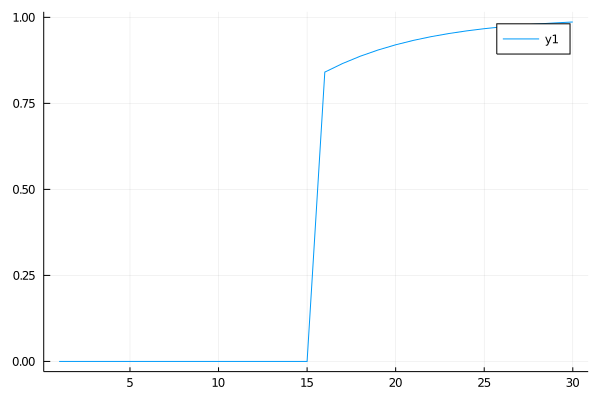

In [2]:
A_max = 30
A = 1:A_max
fecundity = fecundity_at_age.isometric_LVB_A_mature.(A,15,1.0,0.18,0.0)
Plots.plot(fecundity)

0.5440000000000002

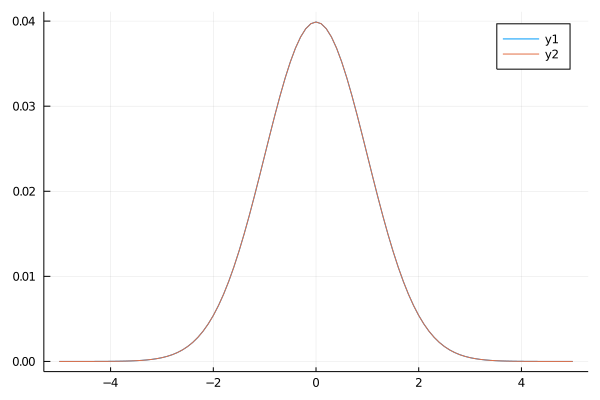

In [3]:
# check that convolutions are working
# inital distribution should match distribution after
# reproduction at equilibirum. 
pop = full_trait_distribution.init_population(4, repeat([0.2],4), [0.1,0.1,10,3], 5 , 1, 0, 0.1, -5, 5, 0.1, 1)
Plots.plot(pop.grid,pop.trait[:,1])
dsn, F = full_trait_distribution.reproduction(pop)
Plots.plot!(pop.grid,dsn)

In [58]:
function f(t)
    for i in 1:10000 
        full_trait_distribution.reproduction(pop)
    end
end 
@time f(1)

  2.359996 seconds (2.02 M allocations: 359.497 MiB, 1.44% gc time)


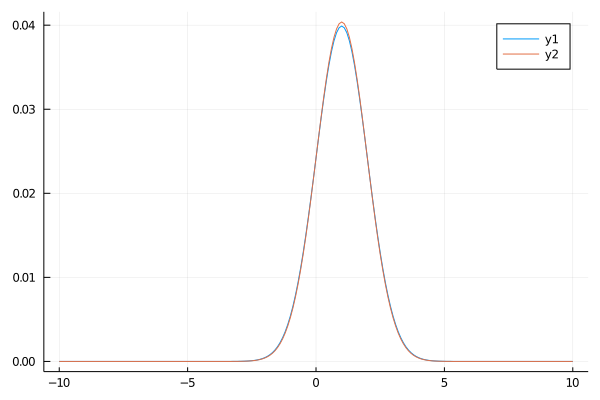

In [138]:
# check distriburiona after fecundity selection
# it should have the same center, but a tighter variance 
# due to stabalizing selection
Plots.plot(pop.grid,pop.trait[:,1])
dsn,f = full_trait_distribution.selection_and_reproduction(pop)
Plots.plot!(pop.grid,dsn)

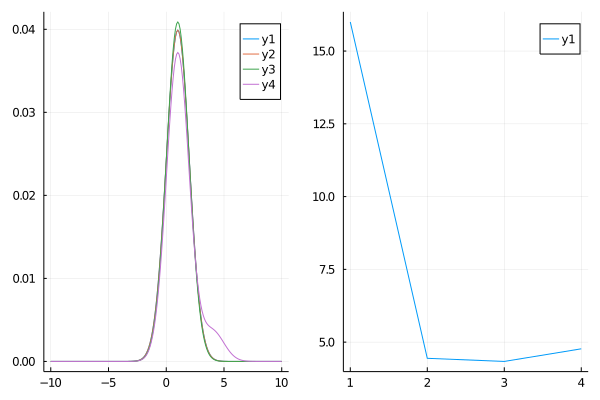

In [139]:
# plot abundace and distribution through life cycle
# initial values
N = zeros(4)
p1 = Plots.plot(pop.grid,pop.trait[:,3])

# reproduction
dsn, F = full_trait_distribution.reproduction(pop)
N[1] = F
Plots.plot!(p1, pop.grid, dsn)

# dentisy dependence
R = full_trait_distribution.recruitment(F, pop)
N[2] = R

# seleciton
dsn, R = full_trait_distribution.selection(dsn, R, pop)
N[3] = R
Plots.plot!(p1, pop.grid, dsn)

# immigration 
d_im = Distributions.Normal(4,1)
dsn_im = pdf.(d_im, pop.grid)
dsn_im = dsn_im ./ sum(dsn_im)

dsn, R = full_trait_distribution.immigration(dsn, R, dsn_im, 0.1*R)
N[4] = R
Plots.plot!(p1, pop.grid, dsn)
p2 = Plots.plot(N)
plot(p1,p2)

In [140]:
 # immigration 
d_im = Distributions.Normal(5,1)
dsn_im = pdf.(d_im, pop.grid)
dsn_im = dsn_im ./ sum(dsn_im)

R_im = 0.1

# define dynamics 
function update!(pop, dsn_im, R_im)

    # reproduction
    dsn, F = full_trait_distribution.reproduction(pop)
    # dentisy dependence
    R = full_trait_distribution.recruitment(F, pop)

    # seleciton
    dsn, R = full_trait_distribution.selection(dsn, R, pop)

    # immigration
    dsn, R = full_trait_distribution.immigration(dsn, R, dsn_im, R_im*R)
    
    # ageing!
    pop = full_trait_distribution.ageing!(pop, R, dsn)
    return pop
end


update! (generic function with 2 methods)

In [190]:

pop = full_trait_distribution.init_population(A_max, repeat([0.9],A_max),fecundity, 0.575 ,10, 1.0, 0.1, -5.0, 15, 0.1, 0.5)
T = 50
T_after = T*10
#pop = full_trait_distribution.init_population(4, [1,0.8,0.8,0.1], [0.0,0.0,2.0,3.0], 0.4,10, 1.0, 0.2, -5.0, 15, 0.1, 1.0)


# let population equilibrate 
# immigration 
d_im = Distributions.Normal(5.0,1)
dsn_im = pdf.(d_im, pop.grid)
dsn_im = dsn_im ./ sum(dsn_im)

R_im = 0.0
for i in 1:2000
    pop = update!(pop, dsn_im, R_im)  
end
# start plotting 
p1 = Plots.plot(pop.grid,pop.trait[:,1], legend = false)
p2 = Plots.plot(pop.abundance, legend = false)
N_acc = zeros(2*T+T_after)
R_im = 0.0
for i in 1:T
    
    pop = update!(pop, dsn_im, R_im)
    N_acc[i] = sum(pop.abundance .* pop.fecundity)
    Plots.plot!(p1,pop.grid,pop.trait[:,1])
    Plots.plot!(p2,pop.abundance)
    
end 

R_im = 0.1
for i in 1:T
    
    pop = update!(pop, dsn_im, R_im)
    N_acc[i+T] = sum(pop.abundance .* pop.fecundity)
    Plots.plot!(p1,pop.grid,pop.trait[:,1])
    Plots.plot!(p2,pop.abundance)
    
end 

R_im = 0.0
for i in 1:T_after
    
    pop = update!(pop, dsn_im, R_im)
    N_acc[i+2*T] = sum(pop.abundance .* pop.fecundity)
    Plots.plot!(p1,pop.grid,pop.trait[:,1])
    Plots.plot!(p2,pop.abundance)
    
end 
p3 = Plots.plot(N_acc)
plot(p1,p2,p3)

In [37]:
v= [1,2,3,4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [38]:
v[1:end-2] = v[2:end-1]
v

4-element Array{Int64,1}:
 2
 3
 3
 4

In [35]:
v[2:end-1]

2-element Array{Int64,1}:
 2
 3

1.5

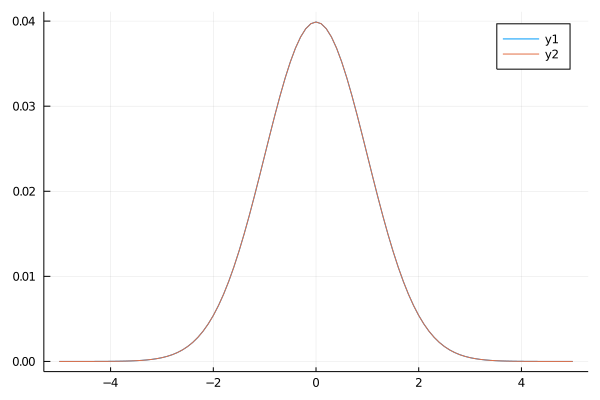

In [7]:
pop = full_trait_distribution.init_population(1, [0.0], [1.5], 5 , 1, 0, 0.1, -5, 5, 0.1, 1)
Plots.plot(pop.grid,pop.trait[:,1])
dsn, F = full_trait_distribution.reproduction(pop)
Plots.plot!(pop.grid,dsn)

In [83]:


# immigration 
d_im = Distributions.Normal(1,1)
dsn_im = pdf.(d_im, pop.grid)
dsn_im = dsn_im ./ sum(dsn_im)

R_im = 0.1

# define dynamics 
function update!(pop, dsn_im, R_im)

    # reproduction
    dsn, F = full_trait_distribution.reproduction(pop)
    # dentisy dependence
    R = full_trait_distribution.recruitment(F, pop)

    # seleciton
    dsn, R = full_trait_distribution.selection(dsn, R, pop)

    # immigration
    dsn, R = full_trait_distribution.immigration(dsn, R, dsn_im, R_im*R)
    
    # ageing!
    pop = full_trait_distribution.ageing!(pop, R, dsn)
    return pop
end




update! (generic function with 1 method)

10.0
0.11954614464378846
0.8649146496435527

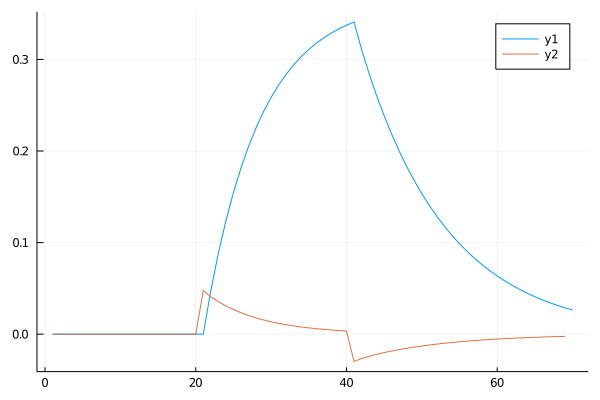

In [84]:
R_im = vcat(repeat([0],20), repeat([0.05],20), repeat([0],30))
N = length(R_im)
pop = full_trait_distribution.init_population(2, [0.001,0.0], [10,0.0], 5 , 1, 0, 0.1, -5, 5, 0.1, 1)
mu = zeros(N)
sigma = zeros(N)
N_ls = zeros(N)
for i in 1:N
    update!(pop, dsn_im, R_im[i])
    mu[i] = sum(pop.trait[:,2] .* pop.grid)
    sigma[i] = sum(pop.trait[:,2] .* (pop.grid .- mu[i]).^2)
    N_ls[i] = pop.abundance[1]
end 
print("\n")
print(sum(mu./N))
print("\n")
print(sum(sigma./N))
p1 = Plots.plot(mu)
#Plots.plot!(p1, sigma)
Plots.plot!(mu[2:end] .- mu[1:end-1])
p1

1.0
0.2909364341534345
0.8785245178984339

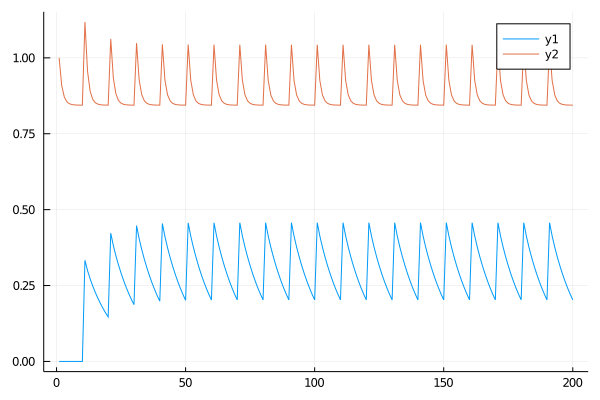

In [85]:
N = 200
pop = full_trait_distribution.init_population(2, [0.001,0.0], [1.0,0.0], 5 , 1, 0, 0.1, -5, 5, 0.1, 1)
mu = zeros(N)
sigma = zeros(N)
R_im_t = 0
for i in 1:N
    if mod(i,10) ==0
        R_im_t = 0.5
    else
        R_im_t = 0
    end
    update!(pop, dsn_im, R_im_t)
    mu[i] = sum(pop.trait[:,2] .* pop.grid)
    sigma[i] = sum(pop.trait[:,2] .* (pop.grid .- mu[i]).^2)
end 
print("\n")
print(sum(mu./N))
print("\n")
print(sum(sigma./N))
Plots.plot(mu)
Plots.plot!(sigma)

0.6796341092769191